### 데이터 준비하기
#### 토지 데이터

In [207]:
import pandas as pd

lot_pnilp = pd.read_csv(
  'https://raw.githubusercontent.com/Bob-Cheol/bobtory/master/study/HongongMachine/2nd_study/etc/lpp_pnilp.csv',
  header=None
)
lot_pnilp = [v for v in lot_pnilp.values[0]]
lot_parea = pd.read_csv(
  'https://raw.githubusercontent.com/Bob-Cheol/bobtory/master/study/HongongMachine/2nd_study/etc/lpp_parea.csv',
  header=None
)
lot_parea = [v for v in lot_parea.values[0]]
lot_is_gangnam = pd.read_csv(
  'https://raw.githubusercontent.com/Bob-Cheol/bobtory/master/study/HongongMachine/2nd_study/etc/lpp_is_gangnam.csv',
  header=None
)
lot_is_gangnam = [v for v in lot_is_gangnam.values[0]]

In [208]:
print(len(lot_pnilp))
print(len(lot_parea))
print(len(lot_is_gangnam))

19787
19787
19787


- 모두 19,787개 데이터

In [220]:
print(lot_is_gangnam[0:10])
print(lot_is_gangnam[-10:-1])
print(lot_is_gangnam.count(0))
print(lot_is_gangnam.count(1))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
14511
5276


- 데이터 순서는 [강북구 수유동, 강남구 논현동]
- 강북구 수유동 데이터 14,511개, 강남구 논현동 데이터 5,276개

In [221]:
lot_pnilp_F = lot_pnilp[:14_511]
lot_pnilp_T = lot_pnilp[14_511:]
lot_parea_F = lot_parea[:14_511]
lot_parea_T = lot_parea[14_511:]
lot_is_gangnam_F = lot_is_gangnam[:14_511]
lot_is_gangnam_T = lot_is_gangnam[14_511:]

### 산점도(scatter) 확인

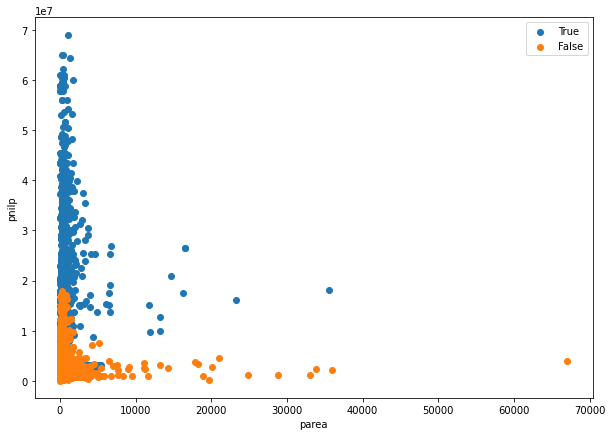

In [222]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,7])
plt.scatter( # 강남구 논현동
  lot_parea_T,
  lot_pnilp_T
)
plt.scatter( # 강북구 수유동
  lot_parea_F,
  lot_pnilp_F
)
plt.legend(
  ['True', 'False']
)
plt.xlabel('parea')
plt.ylabel('pnilp')
plt.show()

- 상대적으로 강남(True)의 pnilp가 높은 것으로 확인됨
- parea에 대한 구분은 10,000 넘는 극대값들으로 인해 확인이 어려움

In [259]:
index_parea_under_10000_T = [a < 10_000 for a in lot_parea_T]
index_parea_under_10000_F = [a < 10_000 for a in lot_parea_F]
print(sum(index_parea_under_10000_T),'/',len(lot_parea_T))
print(sum(index_parea_under_10000_F),'/',len(lot_parea_F))

5266 / 5276
14493 / 14511


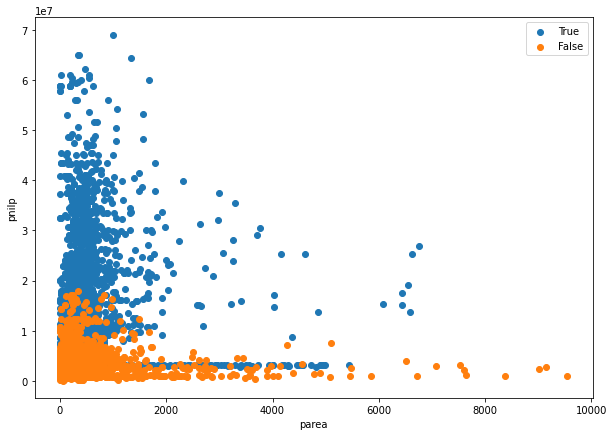

In [260]:
plt.figure(figsize=[10,7])
plt.scatter( # 강남구 논현동
  [v for tf, v in zip(index_parea_under_10000_T, lot_parea_T) if tf],
  [v for tf, v in zip(index_parea_under_10000_T, lot_pnilp_T) if tf]
)
plt.scatter( # 강북구 수유동
  [v for tf, v in zip(index_parea_under_10000_F, lot_parea_F) if tf],
  [v for tf, v in zip(index_parea_under_10000_F, lot_pnilp_F) if tf]
)
plt.legend(
  ['True', 'False']
)
plt.xlabel('parea')
plt.ylabel('pnilp')
plt.show()

- 이전 보다 parea 10,000 미만의 값들의 산포도 확인에 용이함
- 단, parea 1,000 미만으로 한 번 더 확인 필요
- parea 1,000 이상인 데이터가 낮고 길다란 분포를 한 것이 특징임
  - parea와 무관하게 parea가 일정한 데이터가 존재함
  - 강남과 강북에서 동일하게 확인됨

5041 / 5276
14308 / 14511


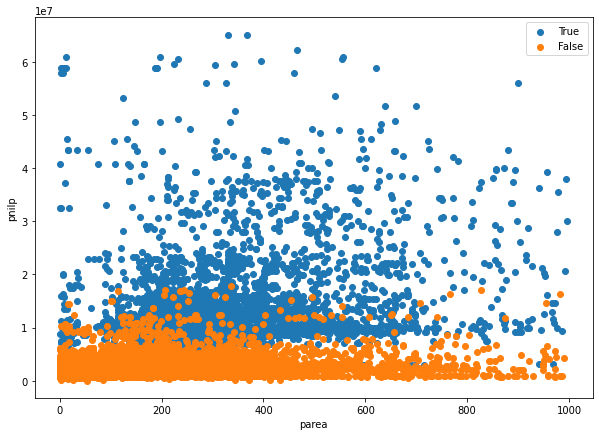

In [261]:
index_parea_under_1000_T = [a < 1_000 for a in lot_parea_T]
index_parea_under_1000_F = [a < 1_000 for a in lot_parea_F]
print(sum(index_parea_under_1000_T),'/',len(lot_parea_T))
print(sum(index_parea_under_1000_F),'/',len(lot_parea_F))

plt.figure(figsize=[10,7])
plt.scatter( # 강남구 논현동
  [v for tf, v in zip(index_parea_under_1000_T, lot_parea_T) if tf],
  [v for tf, v in zip(index_parea_under_1000_T, lot_pnilp_T) if tf]
)
plt.scatter( # 강북구 수유동
  [v for tf, v in zip(index_parea_under_1000_F, lot_parea_F) if tf],
  [v for tf, v in zip(index_parea_under_1000_F, lot_pnilp_F) if tf]
)
plt.legend(
  ['True', 'False']
)
plt.xlabel('parea')
plt.ylabel('pnilp')
plt.show()

- 강남(True)의 pnilp(공시지가)가 상대적으로 높음을 시각적으로 확인할 수 있음
- 단, parea(토지면적)는 두 지역간 격차를 알기 어려워 보임
- 지역 분류는 pnilp의 영향을 많이 받을 것으로 예상됨

### 첫 번째 머신러닝 프로그램 : K-Nearest Neighbors Classifier(K 최근접 이웃 분류 모델)
- 데이터를 2차원 리스트 형태로 만들어야 사용할 수 있음

In [264]:
lot_data = [[p, a] for p, a in zip(lot_pnilp, lot_parea)]

In [267]:
print(lot_data[0:10])

[[900900, 2089.0], [991600, 17.0], [3125000, 48.0], [2965000, 25.0], [1097000, 129.0], [1847000, 76.0], [1845000, 126.0], [1847000, 30.0], [919000, 98.0], [972000, 912.0]]


- 사이킷런에서 K-최근접 이웃 분류 알고리즘 임포트

In [269]:
from sklearn.neighbors import KNeighborsClassifier

In [271]:
kn = KNeighborsClassifier()

### 모델 학습
- fit() 활용
- lot_data로 모델 학습

In [272]:
kn.fit(lot_data, lot_is_gangnam)

KNeighborsClassifier()

### 모델 평가
- score() 활용
- 학습에 사용한 데이터로 평가

In [273]:
kn.score(lot_data, lot_is_gangnam)

0.991610653459342

### 데이터 평가하기
- predict() 활용
- 임의의 데이터 A [5,000,000, 100] 에 대한 모델 평가 확인하기

In [284]:
kn.predict([[5_000_000, 100]])

array([0], dtype=int64)

### 임의의 데이터 예측하기
- 임의의 데이터 B [10,000,000, 100] 에 대한 모델 평가 확인하기

In [285]:
kn.predict([[10_000_000, 100]])

array([1], dtype=int64)

- 데이터 A의 예측값은 0으로 강북구, 데이터 B의 예측값은 1로 강남구를 예측함
- **K 최근접 이웃 알고리즘은 해당 데이터로부터 가까운 N개의 데이터 중 많은 비율의 데이터를 따라서 평가하는 방식**
- 모형을 학습하는 것이 아니라 모든 학습 데이터를 저장하고 있다가 동일한 알고리즘을 반복함
  - _fit_X 에서 학습용 입력 데이터, _y 에서 학습용 타깃 데이터가 저장되어 있는 것을 확인할 수 있음

In [287]:
print(kn._fit_X)

[[9.0090e+05 2.0890e+03]
 [9.9160e+05 1.7000e+01]
 [3.1250e+06 4.8000e+01]
 ...
 [4.1400e+07 1.4813e+03]
 [4.9170e+07 2.3300e+02]
 [9.0480e+06 4.0970e+02]]


In [289]:
print(kn._y)

[0 0 0 ... 1 1 1]


- 만약 K 최근접 이웃 알고리즘의 평가할 이웃 개수를 전체 데이터 개수와 동일하게 할 경우, 데이터 개수가 많은 강북구로 모든 데이터를 평가함
  - 이 경우 강북구 데이터만 정확한 예측이 됨

In [293]:
kn = KNeighborsClassifier(n_neighbors=len(lot_data))
kn.fit(lot_data, lot_is_gangnam)
kn.score(lot_data, lot_is_gangnam)

0.7333602870571587

- 정확도 73.3%
- 전체 데이터 중 강북구 데이터 개수의 비율과 비교

In [296]:
print(lot_is_gangnam.count(0)/len(lot_is_gangnam))

0.7333602870571587


- 정확도 73.3%
- n_neighbors가 전체 데이터 개수일 때와 전체 데이터 중 강북구 데이터 개수는 동일함